<a href="https://colab.research.google.com/github/hamsiniR/Fraud-detection-Health-Insurance/blob/master/medical_provider_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
data=pd.read_csv('/content/drive/My Drive/Final_year_Project/Datasets/Train_ProviderWithPatientDetailsNUMERIC.csv')
data.head()
df = data.iloc[:,2:85]

df.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
1,0,0,1,1,1,1,1,1,-1,1,1,1,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,1,-1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,-1,0
2,0,0,2,2,2,2,2,2,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,2,-1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,2,2,-1,0
3,0,0,3,3,3,3,3,3,0,-1,3,2,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,3,-1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,3,3,-1,0
4,0,0,4,4,4,4,4,4,-1,-1,4,3,2,2,2,2,0,0,-1,-1,-1,-1,-1,-1,-1,-1,1,2,0,0,0,0,4,-1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,2,1,4,4,-1,0


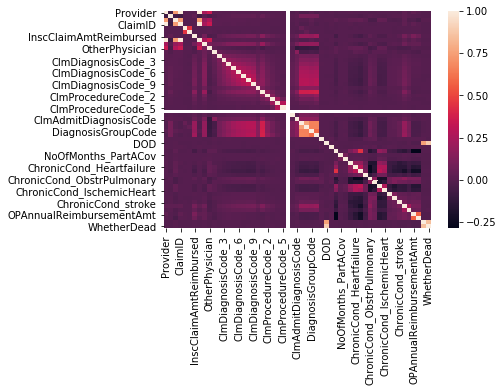

In [ ]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
dataset_corr = df.corr()['PotentialFraud'][:-1] # -1 because the latest row is Solar_power_generation
features_list = dataset_corr[abs(dataset_corr) > 0].sort_values(ascending=False)
print("There is {}  correlated values with Potential Fraud:\n{}".format(len(features_list), features_list))

There is 53  correlated values with Potential Fraud:
PotentialFraud                     1.000000
AdmissionDt                        0.097490
DischargeDt                        0.097029
DiagnosisGroupCode                 0.091501
AdmitForDays                       0.091272
ClmProcedureCode_1                 0.051447
ClmDiagnosisCode_9                 0.039604
ClmDiagnosisCode_8                 0.039144
ClmDiagnosisCode_7                 0.035286
ClmDiagnosisCode_6                 0.033286
InscClaimAmtReimbursed             0.030339
ClmDiagnosisCode_5                 0.029408
IPAnnualReimbursementAmt           0.027964
ClmDiagnosisCode_4                 0.023022
ClmAdmitDiagnosisCode              0.020793
ClmDiagnosisCode_10                0.020433
ClmProcedureCode_2                 0.019848
ClmDiagnosisCode_3                 0.018590
IPAnnualDeductibleAmt              0.013669
DeductibleAmtPaid                  0.013652
ChronicCond_ObstrPulmonary         0.012073
ClmDiagnosisCode_2     

In [ ]:
remove_columns=['ClmProcedureCode_4','ChronicCond_rheumatoidarthritis','DOB','ClaimEndDt','ClmProcedureCode_5','ChronicCond_Osteoporasis','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','ChronicCond_Depression','ClaimStartDt','DOD','Gender','NoOfMonths_PartBCov',              
'Age','NoOfMonths_PartACov','ChronicCond_Cancer','ChronicCond_Diabetes','ChronicCond_Alzheimer','ClmDiagnosisCode_1','RenalDiseaseIndicator','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','OtherPhysician','BeneID','AttendingPhysician','Provider','ClaimID']

dataset_main = df.drop(axis=1,columns=remove_columns)
dataset_main.shape
dataset_main.head()

#dataset = dataset_main.to_csv('/content/drive/My Drive/Final_year_Project/Datasets/dataset.csv')

,PotentialFraud,InscClaimAmtReimbursed,OperatingPhysician,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,ChronicCond_ObstrPulmonary,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,WhetherDead
0,0,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,0,0,0,0
1,0,1,-1,1,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,1,0,0,0
2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,0,0,0,0,0
3,0,3,0,2,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,1,0,1,1,0
4,0,4,-1,3,2,2,2,2,0,0,-1,-1,-1,-1,-1,-1,1,2,0,0,0,0,0,1,2,1,0


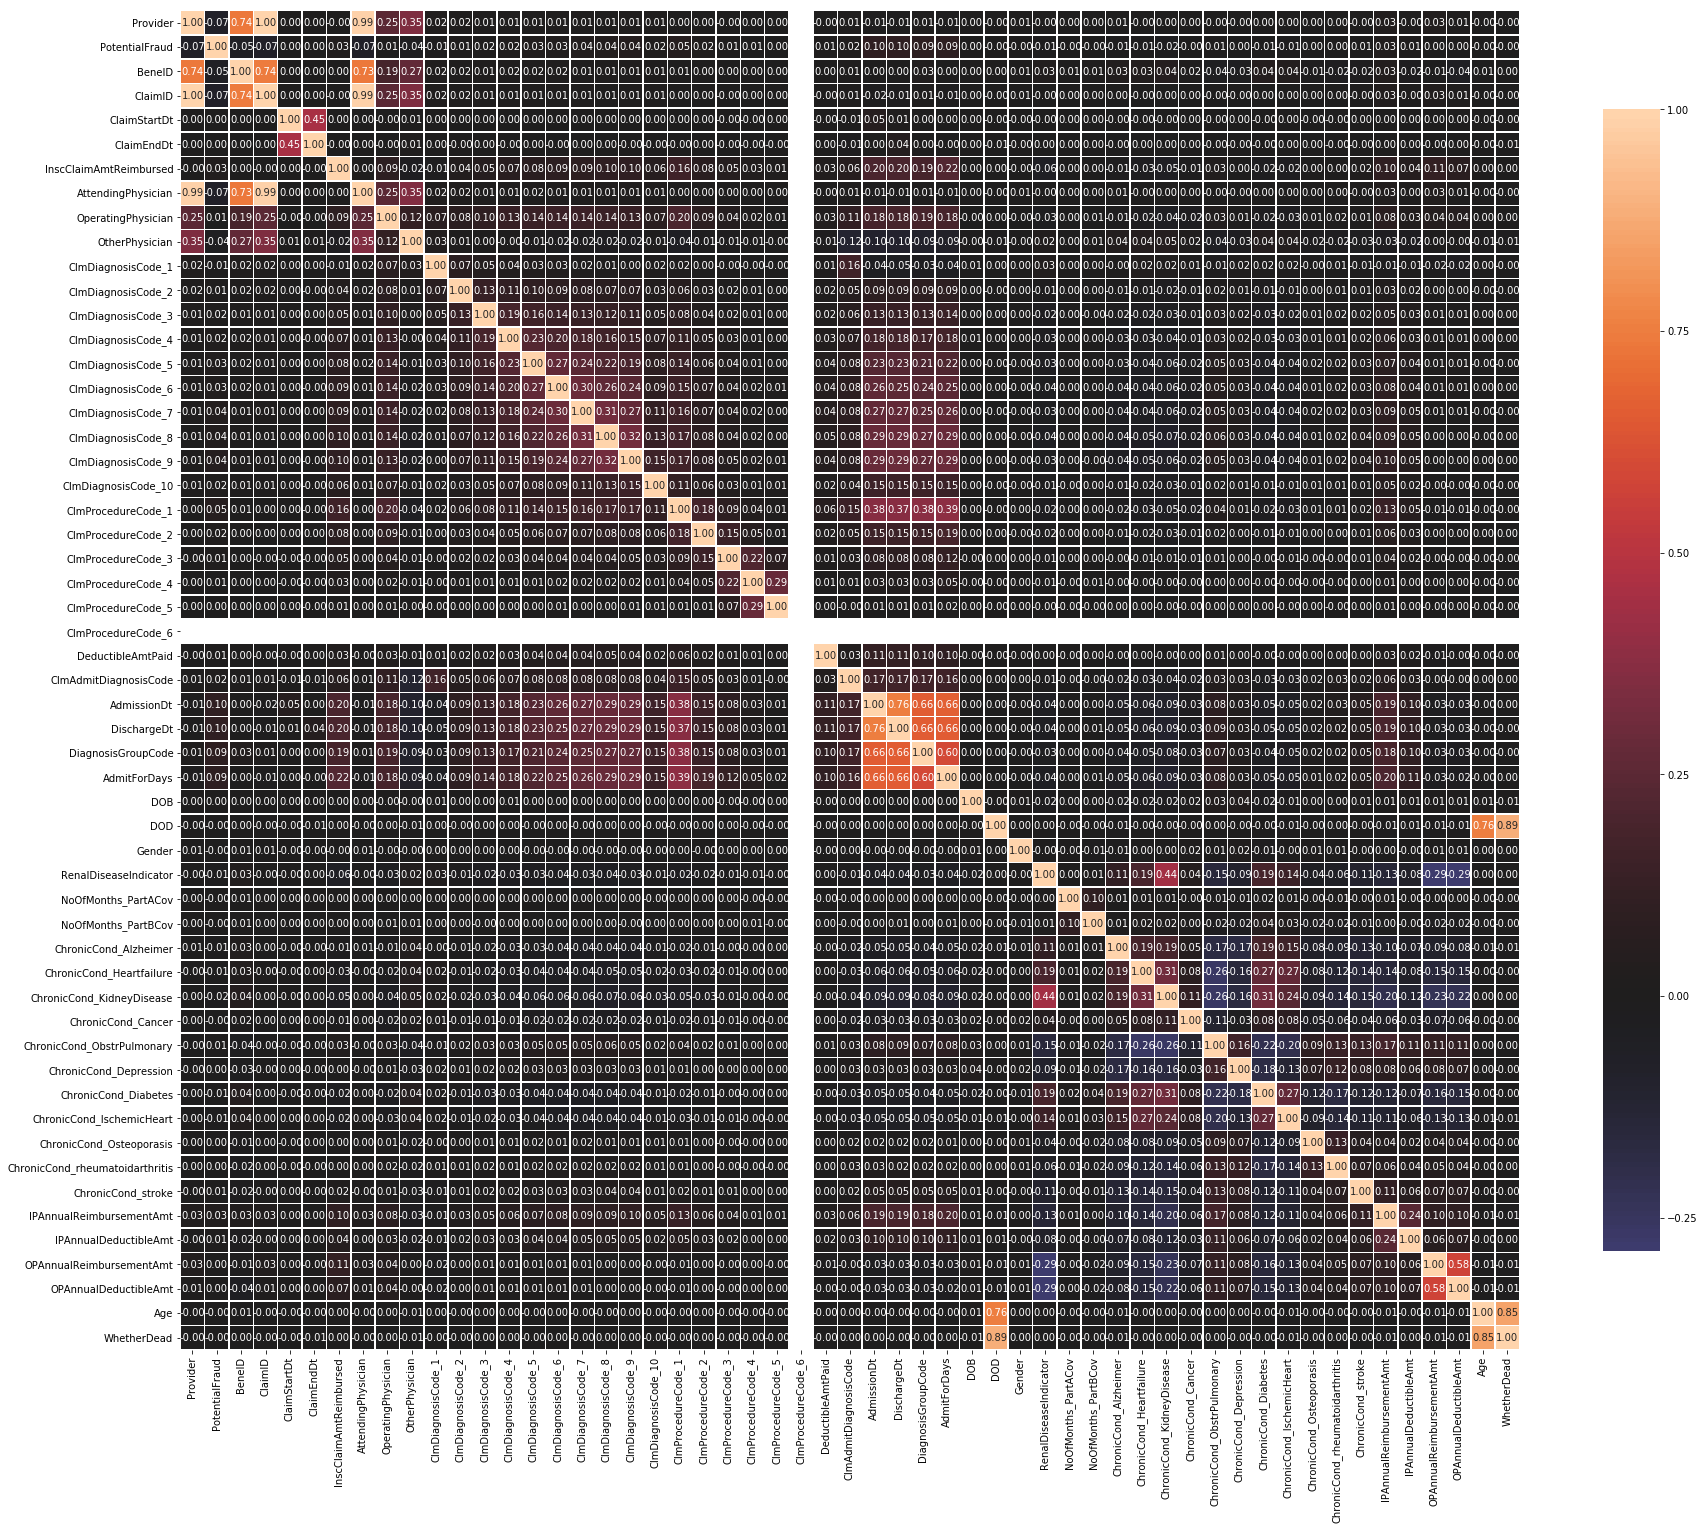

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

# **Logistic Regression**

In [ ]:
X = dataset_main.iloc[:,1:]
y = dataset_main.iloc[:,0]

In [ ]:
X.head()

,InscClaimAmtReimbursed,OperatingPhysician,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,ChronicCond_ObstrPulmonary,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,WhetherDead
0,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,0,0,0,0
1,1,-1,1,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,1,0,0,0
2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,0,0,0,0,0
3,3,0,2,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,1,0,1,1,0
4,4,-1,3,2,2,2,2,0,0,-1,-1,-1,-1,-1,-1,1,2,0,0,0,0,0,1,2,1,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PotentialFraud, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

#print(X_std[0:3,:])
#print(X_teststd[0:3,:])

In [ ]:
print('X Shape:',X_std.shape)

X Shape: (558211, 26)


In [ ]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)

In [ ]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (390747, 26)
y_train : (390747,)
X_val : (167464, 26)
y_val : (167464,)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=123, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

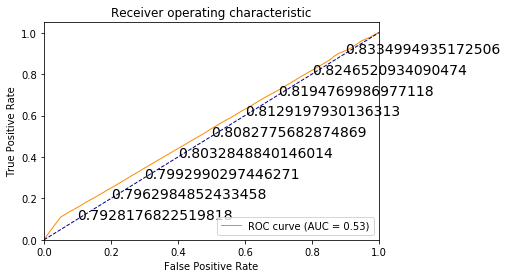

In [ ]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.533586


In [ ]:
log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[ 14740 134217]
 [ 10570 231220]]
Confusion Matrix Val: 
 [[ 6333 57506]
 [ 4631 98994]]
Accuracy Train:  0.6294610067383755
Accuracy Val:  0.6289530884249749
Sensitivity Train :  0.09895473190249535
Sensitivity Val:  0.09920268174626795
Specificity Train:  0.9562843790065759
Specificity Val:  0.9553100120627261
Kappa Value : 0.06481898108987294
AUC         : 0.5272563469044971
F1-Score Train  :  0.16916570549788543
F1-Score Val  :  0.169324759702151


# RANDOM FORESTS

In [ ]:
## Lets Apply Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)   # We will set max_depth =4

In [ ]:
rfc.fit(X_train,y_train)  #fit the model

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

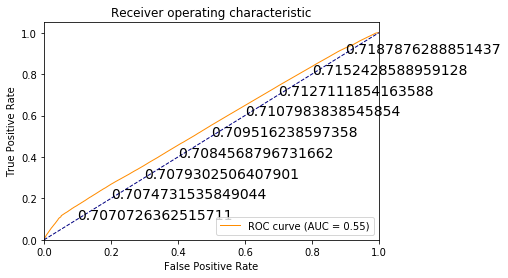

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)   # Set threshold to 0.5
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.5).astype(bool)# Set threshold to 0.5

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[ 17152 131805]
 [ 12184 229606]]
Confusion Matrix Test: 
 [[ 7383 56456]
 [ 5290 98335]]
Accuracy Train :  0.6315032489053019
Accuracy Test :  0.6312879185974299
Sensitivity :  0.1156503078055734
Specificity :  0.9489505428226779
Kappa Value : 0.07634788184527275
AUC         : 0.5323004253141257
F1-Score Train 0.19240239381243238
F1-Score Validation :  0.19298933500627352


In [ ]:
feature_list = list(dataset_main.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Top -20 features impacting Random forest model and their importance score :- \n',)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:15]];

Top -20 features impacting Random forest model and their importance score :- 

Variable: DischargeDt          Importance: 0.19
Variable: AdmissionDt          Importance: 0.18
Variable: DiagnosisGroupCode   Importance: 0.17
Variable: AdmitForDays         Importance: 0.16
Variable: OperatingPhysician   Importance: 0.07
Variable: DeductibleAmtPaid    Importance: 0.07
Variable: ClmProcedureCode_1   Importance: 0.05
Variable: ClmDiagnosisCode_7   Importance: 0.02
Variable: ClmDiagnosisCode_8   Importance: 0.02
Variable: ClmDiagnosisCode_9   Importance: 0.02
Variable: ClmDiagnosisCode_5   Importance: 0.01
Variable: ClmDiagnosisCode_6   Importance: 0.01
Variable: ClmAdmitDiagnosisCode Importance: 0.01
Variable: IPAnnualReimbursementAmt Importance: 0.01
Variable: IPAnnualDeductibleAmt Importance: 0.01


# K MEANS CLUSTERING

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time


In [ ]:
X = dataset_main.iloc[:,1:26]
y = dataset_main.iloc[:,0]


train_features,test_features,train_labels,test_labels=train_test_split(X,y,train_size=0.80,random_state=10)
train_features=normalize(train_features)
test_features=normalize(test_features)

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_features)
kmeans_predicted_train_labels=kmeans.predict(train_features)
kmeans_predicted_train_labels[:10]

array([3, 2, 1, 0, 3, 0, 0, 3, 1, 2], dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 8.47601619e-01, -7.70768701e-02, -4.97422911e-02,
        -7.36507880e-02, -7.66409983e-02, -7.70810071e-02,
        -7.71268632e-02, -7.71359291e-02, -7.71359291e-02,
        -7.71359291e-02, -7.71359291e-02, -7.71359291e-02,
        -7.71359291e-02, -7.71359291e-02, -7.71359291e-02,
         1.42130737e-02, -6.86413600e-02, -7.71359291e-02,
        -7.71359291e-02, -7.71359291e-02, -7.71359291e-02,
         1.70325954e-02,  5.35177060e-03,  4.83029768e-02,
         6.11957741e-03],
       [ 1.01197412e-01, -5.39340916e-03,  9.01912347e-01,
         1.04291321e-01,  3.46817908e-02,  1.15366452e-02,
         2.95335436e-03, -9.58924752e-04, -3.05376314e-03,
        -4.48397484e-03, -7.73466919e-03, -7.88734398e-03,
        -7.98330198e-03, -7.98700083e-03, -7.98736929e-03,
         1.99219744e-03,  3.15021457e-02, -5.62094537e-03,
        -5.64868468e-03, -4.25596972e-03, -7.89422045e-03,
         1.99527417e-03,  6.17567789e-04,  4.22736221e-02,
         1.74965195e-03],
    

In [ ]:
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()
reassignflag=False
if tn+tp<fn+fp:
	# clustering is opposite of original classification
	reassignflag=True
kmeans_predicted_test_labels=kmeans.predict(test_features)
if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives


In [ ]:
#calculating confusion matrix for kmeans
confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()
#scoring kmeans
kmeans_accuracy_score=accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score=precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score=recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score=f1_score(test_labels,kmeans_predicted_test_labels)

In [ ]:
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)


K-Means
Confusion Matrix
tn = 51009 fp = 18215
fn = 29876 tp = 12543
Scores
Accuracy --> 0.8521323325242066
Precison --> 0.8105425672695192
Recall --> 0.7184946943374965
F1 --> 0.8352020960377532


# knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn.fit(train_features,train_labels.ravel())
knn_predicted_test_labels=knn.predict(test_features)
#calculating confusion matrix for knn
tn,fp,fn,tp=confusion_matrix(test_labels,knn_predicted_test_labels).ravel()
#scoring knn
knn_accuracy_score=accuracy_score(test_labels,knn_predicted_test_labels)
knn_precison_score=precision_score(test_labels,knn_predicted_test_labels)
knn_recall_score=recall_score(test_labels,knn_predicted_test_labels)
knn_f1_score=f1_score(test_labels,knn_predicted_test_labels)
#printing
print("")
print("K-Nearest Neighbours")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)


K-Nearest Neighbours
Confusion Matrix
tn = 51009 fp = 18215
fn = 29876 tp = 12543
Scores
Accuracy --> 0.8692430335981655
Precison --> 0.8077963456661681
Recall --> 0.795692967773875
F1 --> 0.8428126323844924


**SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn import svm
from sklearn import metrics

svcmodel= svm.SVC(kernel='linear')
svcmodel.fit(train_features, train_labels)
svmpred= svcmodel.predict(test_features)

In [ ]:
print ("Accuracy=",metrics.accuracy_score(test_labels,svmpred))
print ("Precision=",metrics.precision_score(test_labels,svmpred))
print ("Recall=",metrics.recall_score(test_labels,svmpred))